# 13주차 2강 실습

## < 텍스트 마이닝 >
- 비정형 데이터, 텍스트 데이터로부터 유의미한 정보를 추출하는 데이터 분석을 텍스트 마이닝(Text Mining)이라고 한다.

### 1. 웹 크롤링으로 기초 데이터 수집
- 대상 페이지의 구조 살펴보기
- www.namu.wiki
- 웹 크롤링 라이브러리 사용하기

In [3]:
# -*- coding: utf-8 -*-

%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [4]:
!pip install selenium beautifulsoup4

In [5]:
!pip install lxml

In [6]:
from selenium import webdriver
import requests # 크롤링을 해주는 라이브러리
from bs4 import BeautifulSoup
import re

# 윈도우용 크롬 웹드라이버 실행 경로 (Windows)
excutable_path = "./chapter4/chromedriver.exe"

In [15]:
# 크롤링할 사이트 주소를 정의한다.
source_url = "https://namu.wiki/RecentChanges"

# 크롬 드라이버를 사용합니다.
driver = webdriver.Chrome(executable_path=excutable_path)

# 드라이버가 브라우징 할 페이지 소스를 입력합니다
driver.get(source_url)
req = driver.page_source
# req = requests.get(source_url)
# html = req.content

In [16]:
# 사이트의 html 구조에 기반하여 크롤링을 수행합니다.
soup = BeautifulSoup(req, "html.parser")
contents_table = soup.find(name = 'table')
table_body = contents_table.find(name = 'tbody')
table_rows = table_body.find_all(name = 'tr')
# soup
# contents_table

In [17]:
# a태그의 href 속성을 리스트로 추출하여, 크롤링 할 페이지 리스트를 생성한다.
page_url_base = "https://namu.wiki"
page_urls = []
for index in range(0, len(table_rows)):
    first_td = table_rows[index].find_all('td')[0]
    td_url = first_td.find_all('a')
    if len(td_url) > 0:
        page_url = page_url_base + td_url[0].get('href')
        if 'png' not in page_url:
            page_urls.append(page_url)

# 중복 url을 제거한다.
page_urls = list(set(page_urls))
for page in page_urls[:5]:
    print(page)
    
# 크롤링에 사용한 브라우저를 종료합니다.
driver.close()

https://namu.wiki/w/(%EC%97%AC%EC%9E%90)%EC%95%84%EC%9D%B4%EB%93%A4/%EC%9D%8C%EB%B0%98%20%EB%AA%A9%EB%A1%9D
https://namu.wiki/w/%EC%A7%84%EC%A3%BC%20%EB%B2%84%EC%8A%A4%20130
https://namu.wiki/w/%ED%95%B4%EC%9A%B4%EB%8C%80%20%EC%97%B0%EC%9D%B8%EB%93%A4
https://namu.wiki/w/%EC%9A%94%EA%B4%B4%EB%8C%80%EC%A0%84
https://namu.wiki/w/%EC%9E%A5%EB%8B%A4%EC%9A%B4


- 위의 코드를 통해 https://namu.wiki/RecentChanges 페이지의 최근 변경 문서 링크들을 추출.

### [ 텍스트 정보 수집하기 ]

In [18]:
# 크롬 드라이버를 사용합니다
driver = webdriver.Chrome(executable_path=excutable_path)

# 드라이버가 브라우징 할 페이지 소스를 입력합니다
# req = requests.get(page_urls[0])
# html = req.content
# soup = BeautifulSoup(html, 'lxml')
driver.get(page_urls[0])
req = driver.page_source
soup = BeautifulSoup(req, "html.parser")
contents_table = soup.find(name="article")
title = contents_table.find_all('h1')[0]
category = contents_table.find_all('ul')[0]
content_paragraphs = contents_table.find_all(name="div", attrs={"class":"wiki-paragraph"})
content_corpus_list = []

for paragraphs in content_paragraphs:
    content_corpus_list.append(paragraphs.text)
content_corpus = "".join(content_corpus_list)

print(title.text)
print("\n")
print(category.text)
print("\n")
print(content_corpus)

# 크롤링에 사용한 브라우저를 종료합니다.
driver.close()

(여자)아이들/음반 목록 


(여자)아이들아티스트별 음반 목록한국의 음반일본의 음반미국의 음반


   상위 문서: (여자)아이들  미연민니수진소연우기슈화 [ 한국 음반 ] I am미니 1집 2018.05.02 한(一)디싱 1집 2018.08.14I made미니 2집 2019.02.26 Uh-Oh디싱 2집 2019.06.26 I trust미니 3집 2020.04.06 i'M THE TREND디싱 3집 2020.07.07  DUMDi DUMDi싱글 1집 2020.08.03  I burn미니 4집 2021.01.11  화(火花)디싱 4집 2021.01.27 [ 해외 음반 ]일본 음반LATATA미니 1집 2019.07.31Oh my god미니 2집 2020.08.26미국 음반LATATA (English Ver.)디싱 2020.05.15  [ 참여 음반 ]ONE2018.06.17POP/STARS2018.11.04달려! (Relay)2018.11.19Help Me2019.04.11FINAL(컴백전쟁: 퀸덤) 컴백 싱글2019.10.25THE(ALL OUT) BADDEST2020.08.29MORE(ALL OUT)2020.10.28Last Dance2021.04.29 [ 관련 문서 ]음반 목록응원법네버랜드V LIVETo NEVERLAND컴백전쟁: 퀸덤네버엔딩 네버랜드논란 및 사건 사고   미연민니수진소연우기슈화 [ 한국 음반 ] I am미니 1집 2018.05.02 한(一)디싱 1집 2018.08.14I made미니 2집 2019.02.26 Uh-Oh디싱 2집 2019.06.26 I trust미니 3집 2020.04.06 i'M THE TREND디싱 3집 2020.07.07  DUMDi DUMDi싱글 1집 2020.08.03  I burn미니 4집 2021.01.11  화(火花)디싱 4집 2021.01.27 [ 해외 음반 ]일본 음반LATATA미니 1집 2019.07.31Oh my god미니 2집 2020.08.26미국 음반LATATA (English Ver.)디싱 20

### [ 나무위키 최근변경 데이터 크롤링 ]

In [19]:
# 크롤링한 데이터를 데이터 프레임으로 만들기 위해 준비합니다.
columns = ['title', 'category', 'content_text']
df = pd.DataFrame(columns = columns)

# 각 페이지별 '제목', '카테고리', '본문' 정보를 데이터 프레임으로 만듭니다.
for page_url in page_urls:
    
    # 사이트의 html 구조에 기반하여 크롤링을 수행합니다.
    driver = webdriver.Chrome(executable_path=excutable_path)
    # req = requests.get(page_url)
    # html = req.content
    driver.get(page_url)
    req = driver.page_source
    soup = BeautifulSoup(req, "html.parser")
    contents_table = soup.find(name = 'article')
    title = contents_table.find_all('h1')[0]
    
    # 카테고리 정보가 없는 경우를 확인합니다.
    if len(contents_table.find_all('ul')) > 0:
        category = contents_table.find_all('ul')[0]
    else:
        category = None
        
    content_paragraphs = contents_table.find_all(name = 'div', attrs = {"class":"wiki-paragraph"})
    content_corpus_list = []
    
    # 페이지 내 제목 정보에서 개행 문자를 제거한 뒤 추출합니다. 만약 없는 경우, 빈 문자열로 대체합니다.
    if title is not None:
        row_title = title.text.replace("\n", " ")
    else:
        row_title = ""
    
    # 페이지 내 본문 정보에서 개행 문자를 제거한 뒤 추출합니다. 만약 없는 경우, 빈 문자열로 대체합니다.    
    if content_paragraphs is not None:
        for paragraphs in content_paragraphs:
            if paragraphs is not None:
                content_corpus_list.append(paragraphs.text.replace("\n", " "))
            else:
                content_corpus_list.append("")
    else:
        content_corpus_list.append("")
     
    # 페이지 내 카테고리정보에서 “분류”라는 단어와 개행 문자를 제거한 뒤 추출합니다. 만약 없는 경우, 빈 문자열로 대체합니다.
    if category is not None:
        row_category = category.text.replace("\n", " ")
    else:
        row_category = ""
        
    # 모든 정보를 하나의 데이터 프레임에 저장합니다.    
    row = [row_title, row_category, "".join(content_corpus_list)]
    series = pd.Series(row, index = df.columns)
    df = df.append(series, ignore_index = True)
    
    # 크롤링에 사용한 브라우저를 종료합니다.
    driver.close()

In [20]:
# 데이터 프레임을 출력합니다.
df.head(5)

,title,category,content_text
0,(여자)아이들/음반 목록,(여자)아이들아티스트별 음반 목록한국의 음반일본의 음반미국의 음반,상위 문서: (여자)아이들 미연민니수진소연우기슈화 [ 한국 음반 ] I am...
1,진주 버스 130,진주시 시내버스1965년 개업한 버스 노선,진주시 시내버스 [ 펼치기 · 접기 ]통학 노선1020동부 순환001002002-...
2,해운대 연인들,KBS 드라마월화 드라마2012년 드라마부산광역시를 배경으로 한 작품,월화 드라마 [ 펼치기 · 접기 ]2011~2015드림 하이(2011)강력반(...
3,요괴대전,네이버 웹툰소년 만화다크 판타지 만화2019년 웹툰,"네이버 웹툰의 연재작월화수목금토일요괴대전장르액션, 판타지[1]작가글: 강두식그림:..."
4,장다운,유튜버/ㅈ한국 여성 코미디언/ㅈ1988년 출생2013년 데뷔흔한남매백제예술대학교 출...,장다운Jang Da-Wun출생1988년 7월 9일 (33세)출생지광주광역시[1]거주...


### 2. 추출 : 키워드 추출
#### [ 텍스트 데이터 전처리 ]

In [21]:
def text_cleaning(text):
    hangul = re.compile('[^ ㄱ-ㅣ가-힣]+') # 한글의 정규표현식을 나타낸다
    result = hangul.sub('', text)
    return result

print(text_cleaning(df['content_text'][0]))

  상위 문서 여자아이들  미연민니수진소연우기슈화  한국 음반   미니 집  한디싱 집  미니 집  디싱 집   미니 집    디싱 집    싱글 집    미니 집   화디싱 집   해외 음반 일본 음반미니 집   미니 집 미국 음반  디싱    참여 음반 달려  컴백전쟁 퀸덤 컴백 싱글      관련 문서 음반 목록응원법네버랜드  컴백전쟁 퀸덤네버엔딩 네버랜드논란 및 사건 사고   미연민니수진소연우기슈화  한국 음반   미니 집  한디싱 집  미니 집  디싱 집   미니 집    디싱 집    싱글 집    미니 집   화디싱 집   해외 음반 일본 음반미니 집   미니 집 미국 음반  디싱    참여 음반 달려  컴백전쟁 퀸덤 컴백 싱글      관련 문서 음반 목록응원법네버랜드  컴백전쟁 퀸덤네버엔딩 네버랜드논란 및 사건 사고  미니 집  한디싱 집  미니 집  디싱 집   미니 집    디싱 집    싱글 집    미니 집   화디싱 집 일본 음반미니 집   미니 집 미국 음반  디싱 달려  컴백전쟁 퀸덤 컴백 싱글    음반 목록응원법네버랜드  컴백전쟁 퀸덤네버엔딩 네버랜드논란 및 사건 사고 개요 한국 음반 미니 앨범 미니 집   미니 집   미니 집   미니 집   싱글 싱글 집   디지털 싱글 디지털 싱글 한 디지털 싱글  디지털 싱글    일본 음반 미니 집  미니 집    미국 음반 디지털 싱글    가사 참여 음반   런닝맨 풀룰루의 역습  그녀의 사생활    컴백전쟁 퀸덤    대한민국의 걸그룹 여자아이들의 음반 목록을 정리해둔 문서이다발매일앨범 아트음반 종류음반명활동 곡비고년월 일미니 집 월 일디지털 싱글한한년월 일미니 집 월 일디지털 싱글년월 일미니 집   사랑해월 일디지털 싱글  월 일싱글 집  년월 일미니 집 화    트랙곡명작사작곡편곡전소연전소연 빅싼초달라  전소연윤종성 윤종성손영진  전소연손영진   빅싼초 박해일재리포터 전소연빅싼초 박해일재리포터빅싼초 박해일알고 싶어    전소연    들어줘요손영진 노경민손영진가온 차트를 기준으로

In [22]:
df['title'] = df['title'].apply(lambda x: text_cleaning(x))
df['category'] = df['category'].apply(lambda x: text_cleaning(x))
df['content_text'] = df['content_text'].apply(lambda x: text_cleaning(x))
df.head(5)

,title,category,content_text
0,여자아이들음반 목록,여자아이들아티스트별 음반 목록한국의 음반일본의 음반미국의 음반,상위 문서 여자아이들 미연민니수진소연우기슈화 한국 음반 미니 집 한디싱...
1,진주 버스,진주시 시내버스년 개업한 버스 노선,진주시 시내버스 펼치기 접기 통학 노선동부 순환경상대권역진양호권역이현동권역서부...
2,해운대 연인들,드라마월화 드라마년 드라마부산광역시를 배경으로 한 작품,월화 드라마 펼치기 접기 드림 하이강력반동안미녀스파이 명월포세이돈브레인드림...
3,요괴대전,네이버 웹툰소년 만화다크 판타지 만화년 웹툰,네이버 웹툰의 연재작월화수목금토일요괴대전장르액션 판타지작가글 강두식그림 장부규연재...
4,장다운,유튜버ㅈ한국 여성 코미디언ㅈ년 출생년 데뷔흔한남매백제예술대학교 출신코미디언 출신 유...,장다운 출생년 월 일 세출생지광주광역시거주지인천광역시 서구 불로동신체 형 발사이...


#### [ 말뭉치 만들기 ]

In [23]:
title_corpus = "".join(df['title'].tolist())
category_corpus = "".join(df['category'].tolist())
content_corpus = "".join(df['content_text'].tolist())
print(title_corpus)

여자아이들음반 목록 진주 버스  해운대 연인들 요괴대전 장다운 동신중학교서울 김영주북한 근첩     주차 레킹볼 파일원작 버려진 전생현자 마물의 숲에서 최강의 대마제국을 일구어낸다 마요왕군게임국 성폭행 명예훼손 사건 파일 블래스터 마스터 제로 시리즈등장 캐릭터 찬이 패션 모델 정환 색각 이상 의성군 근육맨 세  신한은행   카트라이더 리그 시즌팀전강 클로저스시스템 순당무 월 일 폴 부아예 분류 파리 올림픽 메달리스트 삼성 라이온즈년월 년 정치 혐오 라무링 연휴 아야이터널 리턴 잭 니클라우스 별난 이름 행정구역 개편수도권인천개편론 공격형 미드필더 선바 미니 갤러리의 사생활 폭로 논란 영등포고등학교 창씨개명  오베론 시리즈 틀레드벨벳아이린슬기 진주 버스  연기돌 검정고시 나카무라 유이치 백수 해적단 동이드라마 예천군 고래사냥영화 커트 코베인 몽타주 오브 헥 우사다 레터스 건빵 마음의소리등장인물 모여봐요 동물의 숲마일 여행권 신인호 키미즈카 키미히코 마가렛 아이브 애보트   루트 밀림 나바 공녀님의 꽃밭에는 그들이 산다 이우진 김황록  논란 및 문제점 틀세기 이후 철학 언론의 메갈리아 워마드 옹호 퓰리처상  리그역사 왓 이프 


In [24]:
test_list = ['aa', 'bb', 'cc']
','.join(test_list)

'aa,bb,cc'

# 13주차 3강 실습

### 1. konlpy를 이용하여 키워드 추출하기
- 코드 실행을 위해 아나콘다 프롬프터에 설치한다
- 명령어 : pip install konlpy, pip install jpype1, pip install jpype1-py3

### [ 키워드 가다듬기 ]
- 한글자 키워드 제거

In [25]:
!pip install konlpy

In [26]:
!pip install konlpy==0.5.1
!pip install jpype1
!pip install Jpype1-py3

In [27]:
from konlpy.tag import Okt
from collections import Counter

In [28]:
# konlpy의 형태소 분석기로 명사 단위의 키워드를 추출합니다.
nouns_tagger = Okt()
nouns = nouns_tagger.nouns(content_corpus)
count = Counter(nouns)

In [29]:
count

Counter({'상위': 62,
         '문서': 1421,
         '여자아이': 26,
         '미연': 6,
         '민니': 10,
         '수진': 3,
         '연우': 10,
         '기슈': 2,
         '한국': 357,
         '음반': 36,
         '미니': 57,
         '집': 119,
         '한디싱': 3,
         '디싱': 9,
         '싱글': 22,
         '화디싱': 3,
         '해외': 66,
         '일본': 351,
         '미국': 170,
         '참여': 65,
         '컴백': 18,
         '전쟁': 46,
         '퀸덤': 8,
         '관련': 260,
         '목록': 72,
         '응원': 20,
         '법': 68,
         '네버랜드': 6,
         '네버엔딩': 3,
         '논란': 154,
         '및': 260,
         '사건': 270,
         '사고': 63,
         '개요': 57,
         '앨범': 12,
         '디지털': 17,
         '가사': 6,
         '런닝맨': 7,
         '풀': 52,
         '룰루': 18,
         '역습': 4,
         '그녀': 86,
         '사생활': 9,
         '대한민국': 186,
         '걸그룹': 46,
         '정리': 52,
         '다발': 4,
         '매일': 20,
         '아트': 7,
         '종류': 82,
         '활동': 151,
         '곡': 46,
      

In [30]:
remove_char_counter = Counter({x : count[x] for x in count if len(x) > 1})
print(remove_char_counter)

Counter({'승패': 1690, '문서': 1421, '문단': 1411, '이전': 1312, '역사': 1238, '이름': 996, '트랙': 939, '때문': 883, '경우': 779, '아이템': 710, '경기': 586, '결과': 565, '선수': 564, '모델': 476, '이후': 457, '선택': 453, '사용': 453, '사람': 428, '스피드': 428, '등장': 424, '사항': 424, '합의': 423, '토론': 421, '공격': 417, '정도': 396, '부분': 387, '헨리': 387, '다른': 384, '자신': 368, '한국': 357, '대한': 354, '일본': 351, '사실': 337, '문제': 333, '레킹볼': 321, '시즌': 303, '내용': 300, '시작': 297, '이상': 293, '시간': 285, '스킬': 275, '모습': 274, '하나': 273, '게임': 272, '사건': 270, '피해': 263, '관련': 260, '위해': 255, '또한': 253, '캐릭터': 251, '상황': 250, '고등학교': 240, '페미니즘': 240, '생각': 239, '주의': 234, '매우': 233, '여성': 228, '건빵': 228, '본인': 227, '일반': 224, '접기': 223, '실제': 223, '인천': 222, '해당': 221, '능력': 221, '다시': 217, '당시': 214, '이유': 214, '패승': 214, '방송': 209, '지역': 208, '모두': 207, '그대로': 199, '소피아': 198, '년대': 196, '가장': 194, '현재': 194, '검정고시': 194, '증가': 191, '학교': 189, '상태': 188, '자체': 188, '대한민국': 186, '참고': 186, '제이슨': 186, '보스': 178, '리그': 177, '일부': 177, '마법

### 2. 불용어 제거하기

In [31]:
# 한국어 약식 불용어사진 예시 파일 (https://www.ranks.nl/stopwords/korean)
korean_stopwords_path = "./data/korean_stopwords.txt"

with open(korean_stopwords_path, encoding = 'utf8') as f:
    stopwords = f.readlines()

stopwords = [x.strip() for x in stopwords]
print(stopwords[:10])

['아', '휴', '아이구', '아이쿠', '아이고', '어', '나', '우리', '저희', '따라']


In [32]:
namu_wiki_stopwords = ['상위', '문서', '내용', '누설', '아래', '해당',
                       '설명', '표기', '추가', '모든', '사용', '매우', 
                       '가장', '줄거리', '요소', '상황', '편집', '틀',
                       '경우', '때문', '모습', '정도', '이후', '사실',
                       '생각', '인물', '이름', '년월']

for stopword in namu_wiki_stopwords:
    stopwords.append(stopword)

In [33]:
remove_char_counter = Counter({x : remove_char_counter[x] for x in count if x not in stopwords})
print(remove_char_counter)

Counter({'승패': 1690, '문단': 1411, '이전': 1312, '역사': 1238, '트랙': 939, '아이템': 710, '경기': 586, '결과': 565, '선수': 564, '모델': 476, '선택': 453, '사람': 428, '스피드': 428, '등장': 424, '사항': 424, '합의': 423, '토론': 421, '공격': 417, '부분': 387, '헨리': 387, '한국': 357, '대한': 354, '일본': 351, '문제': 333, '레킹볼': 321, '시즌': 303, '시작': 297, '스킬': 275, '게임': 272, '사건': 270, '피해': 263, '관련': 260, '위해': 255, '캐릭터': 251, '고등학교': 240, '페미니즘': 240, '주의': 234, '여성': 228, '건빵': 228, '본인': 227, '일반': 224, '접기': 223, '실제': 223, '인천': 222, '능력': 221, '다시': 217, '당시': 214, '이유': 214, '패승': 214, '방송': 209, '지역': 208, '그대로': 199, '소피아': 198, '년대': 196, '현재': 194, '검정고시': 194, '증가': 191, '학교': 189, '상태': 188, '자체': 188, '대한민국': 186, '참고': 186, '제이슨': 186, '보스': 178, '리그': 177, '일부': 177, '마법': 177, '뮤턴트': 177, '남성': 176, '미국': 170, '대해': 170, '확률': 170, '가지': 168, '출신': 168, '치명': 167, '나무': 164, '이용': 163, '성우': 163, '오베론': 162, '중학교': 160, '입장': 159, '논란': 154, '점수': 154, '조건': 153, '활동': 151, '역시': 151, '탑팻': 151, '이브': 150, '

### 3. 시각화 : 워드 클라우드 시각화

### [ 나무위키 키워드 시각화 ]

##### 한글 폰트 다운로드받기
- http://hangeul.naver.com/webfont/NanumGothic/NanumGothic.ttf

- 제목 키워드

In [34]:
!pip install pytagcloud pygame simplejson

In [35]:
import random
import pytagcloud
import webbrowser

# 가장 출현 빈도수가 높은 40개의 단어를 선정합니다.
ranked_tags = remove_char_counter.most_common(40)

# pytagcloud로 출력할 40개의 단어를 입력합니다. 단어 출력의 최대 크기는 80으로 제한합니다.
taglist = pytagcloud.make_tags(ranked_tags, maxsize = 80)

# pytagcloud 이미지를 생성합니다. 폰트는 나눔 고딕을 사용합니다.
pytagcloud.create_tag_image(taglist, './chapter2/wordcloud.jpg', size = (900, 600),
                            fontname = 'NanumGothic', rectangular=False)

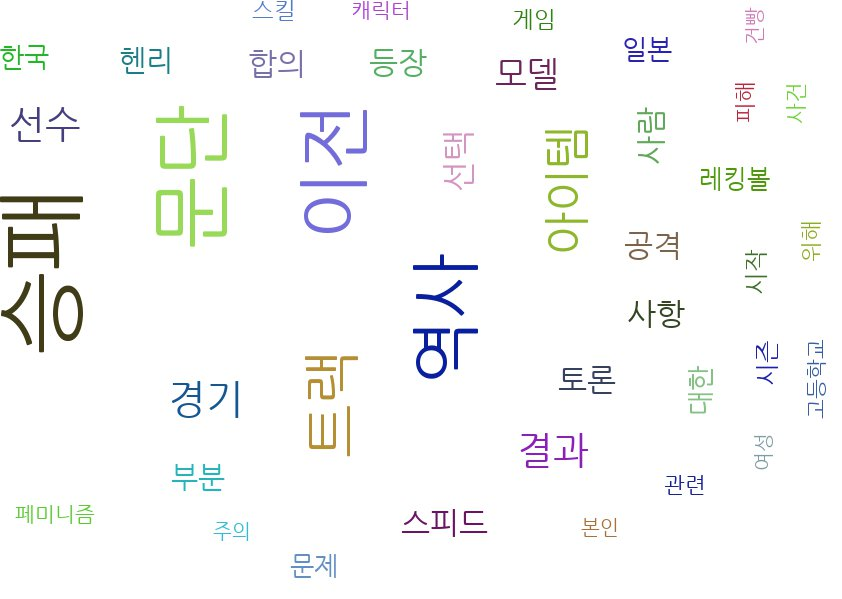

In [36]:
from IPython.display import Image
Image(filename = './chapter2/wordcloud.jpg')

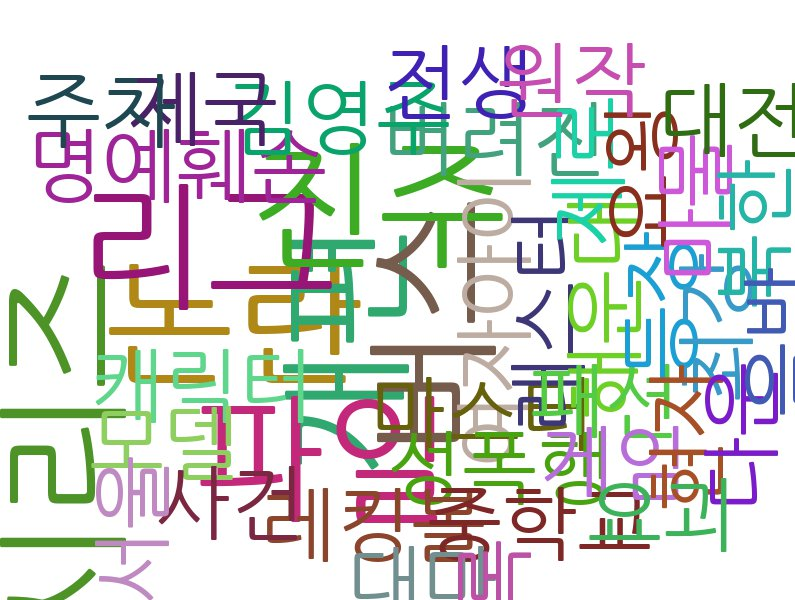

In [37]:
nouns_tagger = Okt()
nouns = nouns_tagger.nouns(title_corpus)
count = Counter(nouns)

remove_char_counter = Counter({x : count[x] for x in count if len(x) > 1})
remove_char_counter = Counter({x : remove_char_counter[x] for x in count if x not in stopwords})

ranked_tags = remove_char_counter.most_common(40)
taglist = pytagcloud.make_tags(ranked_tags, maxsize=80)
pytagcloud.create_tag_image(taglist, './chapter2/title_wordcloud.jpg', size = (900, 600),
                            fontname = 'NanumGothic', rectangular = False)

Image(filename = './chapter2/title_wordcloud.jpg')

- 카테고리 키워드

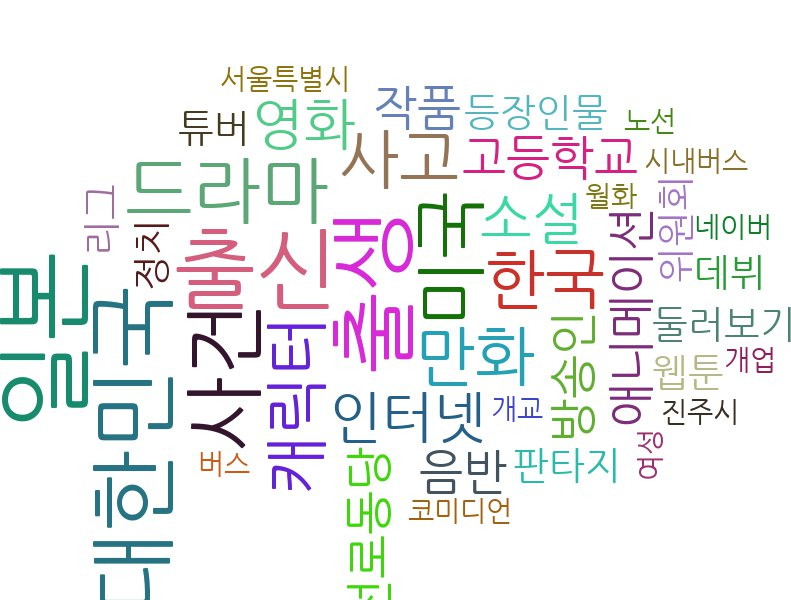

In [38]:
nouns_tagger = Okt()
nouns = nouns_tagger.nouns(category_corpus)
count = Counter(nouns)

remove_char_counter = Counter({x : count[x] for x in count if len(x) > 1})
remove_char_counter = Counter({x : remove_char_counter[x] for x in count if x not in stopwords})

ranked_tags = remove_char_counter.most_common(40)
taglist = pytagcloud.make_tags(ranked_tags, maxsize=80)
pytagcloud.create_tag_image(taglist, './chapter2/category_wordcloud.jpg', size = (900, 600),
                            fontname = 'NanumGothic', rectangular = False)

Image(filename = './chapter2/category_wordcloud.jpg')